In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.utils import resample
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score

# Load the Wisconsin Breast Cancer dataset
file_path = r"C:\Users\Shaurya\Downloads\data.csv"
df = pd.read_csv(file_path)

# Drop unnecessary columns
df = df.drop(columns=['id', 'Unnamed: 32'])

# Encode the 'diagnosis' column (M=1, B=0)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

# Handle missing values by dropping rows with null values
df = df.dropna()

# Separate majority and minority classes
majority_class = df[df['diagnosis'] == 0]
minority_class = df[df['diagnosis'] == 1]

# Upsample minority class to balance the dataset
minority_upsampled = resample(minority_class,
                              replace=True,     # sample with replacement
                              n_samples=len(majority_class),    # to match majority class
                              random_state=42) # reproducible results

# Combine majority class with upsampled minority class
balanced_df = pd.concat([majority_class, minority_upsampled])

# Split the balanced dataset into features (X) and target variable (y)
X = balanced_df.drop(columns=['diagnosis'])
y = balanced_df['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=10)  # You can adjust the number of components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Build ANN model
model = Sequential()
model.add(Dense(64, input_dim=X_train_pca.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pca, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)




Epoch 1/50
15/15 [==============================] - 1s 12ms/step - loss: 0.7819 - accuracy: 0.5329 - val_loss: 0.5846 - val_accuracy: 0.6609
Epoch 2/50
15/15 [==============================] - 0s 3ms/step - loss: 0.4804 - accuracy: 0.8202 - val_loss: 0.3985 - val_accuracy: 0.9043
Epoch 3/50
15/15 [==============================] - 0s 3ms/step - loss: 0.3444 - accuracy: 0.8904 - val_loss: 0.2925 - val_accuracy: 0.9304
Epoch 4/50
15/15 [==============================] - 0s 3ms/step - loss: 0.2629 - accuracy: 0.9342 - val_loss: 0.2246 - val_accuracy: 0.9391
Epoch 5/50
15/15 [==============================] - 0s 4ms/step - loss: 0.2079 - accuracy: 0.9386 - val_loss: 0.1777 - val_accuracy: 0.9391
Epoch 6/50
15/15 [==============================] - 0s 4ms/step - loss: 0.1678 - accuracy: 0.9583 - val_loss: 0.1472 - val_accuracy: 0.9565
Epoch 7/50
15/15 [==============================] - 0s 4ms/step - loss: 0.1396 - accuracy: 0.9627 - val_loss: 0.1241 - val_accuracy: 0.9565
Epoch 8/50
15/15 [=

In [2]:
# Evaluate the model
y_pred_prob = model.predict(X_test_pca)
y_pred = np.round(y_pred_prob).flatten().astype(int)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)



5/5 [==============================] - 0s 2ms/step
Accuracy: 0.9860
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        81
           1       1.00      0.97      0.98        62

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.99       143
weighted avg       0.99      0.99      0.99       143



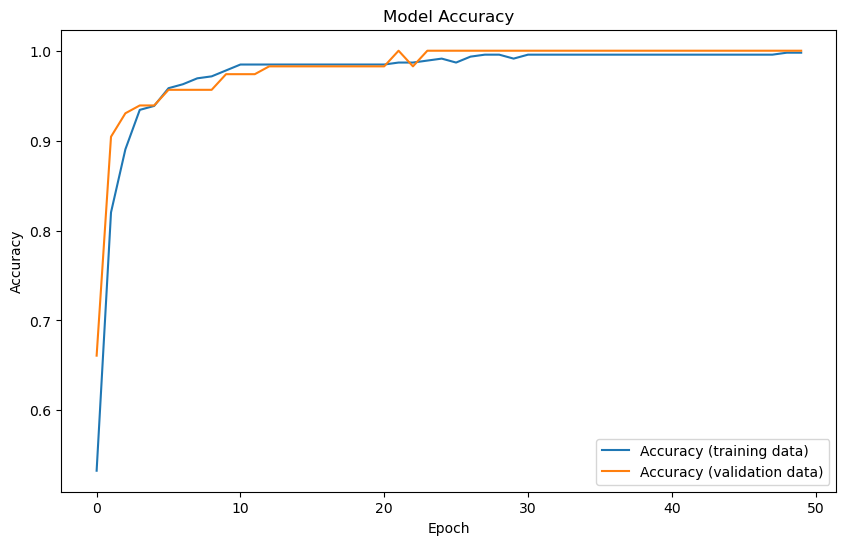

In [3]:
# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Accuracy (training data)')
plt.plot(history.history['val_accuracy'], label='Accuracy (validation data)')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()